<a href="https://colab.research.google.com/github/Jaydeep-2000/ML/blob/main/Decision%20Tree%20/%20Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
path = "https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv"

In [34]:
df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df.shape

(891, 12)

In [36]:
df = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked' ], axis=1)

In [37]:
target = df['Survived']
inputs = df.drop(['Survived'], axis=1)

In [38]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [39]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [40]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [41]:
from sklearn.model_selection import train_test_split

In [42]:

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3)

In [43]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [44]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
model.score(X_test, y_test)

0.7611940298507462

In [56]:
X_test

,Pclass,Sex,Age,Fare
710,1,2,24.000000,49.5042
804,3,1,27.000000,6.9750
628,3,1,26.000000,7.8958
743,3,1,24.000000,16.1000
694,1,1,60.000000,26.5500
...,...,...,...,...
316,2,2,24.000000,26.0000
294,3,1,24.000000,7.8958
219,2,1,30.000000,10.5000
760,3,1,29.699118,14.5000


In [57]:
y_test

710    1
804    1
628    0
743    0
694    0
      ..
316    1
294    0
219    0
760    0
429    1
Name: Survived, Length: 268, dtype: int64

In [58]:
predicted = model.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted)
cm

array([[133,  24],
       [ 40,  71]])

Text(69.0, 0.5, 'Actual')

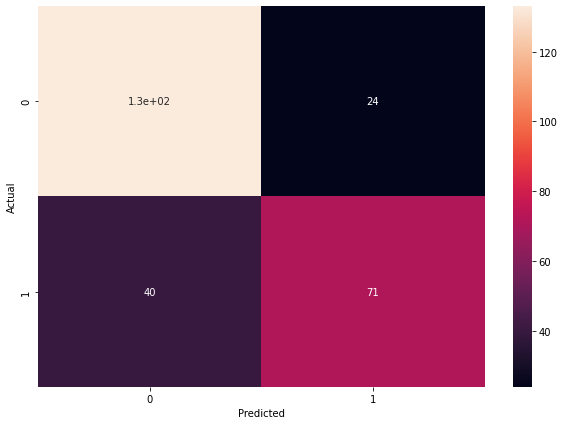

In [55]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")